### Rolling window functions with pandas
In this notebook, you will begin to learn about window functions for time series in pandas.

Window functions are useful because they allow you to operate on sub periods of your time series. In particular, window functions calculate metrics for the data inside the window. Then, the result of this calculation forms a new time series, where each data point represents a summary of several data points of the original time series.


To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [1]:
#libraries
import pandas as pd 
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

In [2]:
#Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data
data = pd.read_csv('Datasets/air_quality_Data-/ozone2.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6291 non-null   int64  
 1   Ozone       6167 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 147.4 KB
None


In [3]:
data.tail()

,Unnamed: 0,Ozone
date,,
2017-03-27,6286,0.005640
2017-03-28,6287,0.013870
2017-03-29,6288,0.034341
2017-03-30,6289,0.026059
2017-03-31,6290,0.035983


In [4]:
#Add the columns '90D' and '360D' containing the 90 and 360 rolling calendar day .mean() for the column 'Ozone'
data['90D'] = data.Ozone.rolling(window="90D").mean()
data['360D'] = data.Ozone.rolling(window="360D").mean()
data.tail()


,Unnamed: 0,Ozone,90D,360D
date,,,,
2017-03-27,6286,0.005640,0.021992,0.026629
2017-03-28,6287,0.013870,0.021999,0.026583
2017-03-29,6288,0.034341,0.022235,0.026584
2017-03-30,6289,0.026059,0.022334,0.026599
2017-03-31,6290,0.035983,0.022467,0.026607


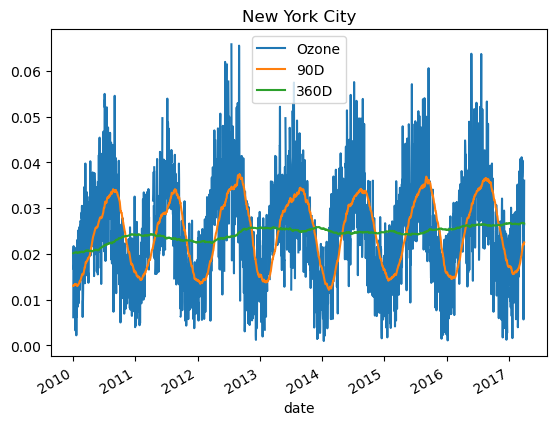

In [5]:
#Plot data starting 2010, setting 'New York City' as title#
data['2010':].plot(y=["Ozone","90D","360D"],title='New York City')
plt.show()


#### Rolling 360-day median & std. deviation for nyc ozone data since 2000

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

In [6]:
#Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, assign the result to data, and drop missing values using .dropna()
data = pd.read_csv('Datasets/air_quality_Data-/ozone2.csv', parse_dates=['date'], index_col='date').dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6167 non-null   int64  
 1   Ozone       6167 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 144.5 KB


In [7]:
#Select the 'Ozone' column and create a .rolling() window using 360 periods, apply .agg() to calculate the mean and std, and assign this to rolling_stats
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])
rolling_stats.head(360)

,mean,std
date,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
...,...,...
2000-12-31,NaN,NaN
2001-01-01,NaN,NaN
2001-01-02,NaN,NaN


In [8]:
# Join rolling_stats with ozone data
stats = data.join(rolling_stats)
stats.head(360)

,Unnamed: 0,Ozone,mean,std
date,,,,
2000-01-01,0,0.004032,NaN,NaN
2000-01-02,1,0.009486,NaN,NaN
2000-01-03,2,0.005580,NaN,NaN
2000-01-04,3,0.008717,NaN,NaN
2000-01-05,4,0.013754,NaN,NaN
...,...,...,...,...
2000-12-31,365,0.016088,NaN,NaN
2001-01-01,366,0.016681,NaN,NaN
2001-01-02,367,0.012097,NaN,NaN


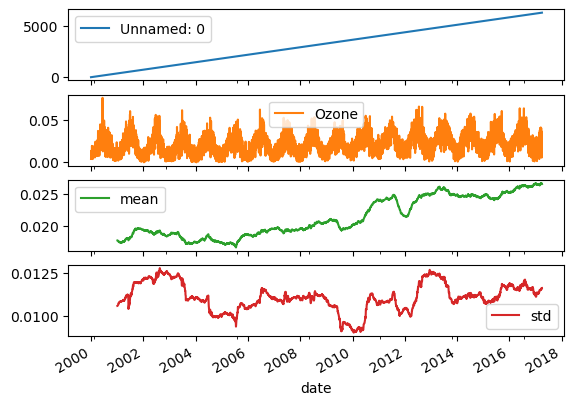

In [9]:
# Plot stats
stats.plot(subplots=True)
plt.show()

How does adding the standard deviation help you understand what's happening in the orignal series?

#### Rolling quantiles for daily air quality in nyc
rolling quantiles helps to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [10]:
#import and inspect Ozone2.csv
df = pd.read_csv('Datasets/air_quality_Data-/ozone2.csv', parse_dates=['date'], index_col='date')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6291 non-null   int64  
 1   Ozone       6167 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 147.4 KB
None


In [11]:
df.head(20)

,Unnamed: 0,Ozone
date,,
2000-01-01,0,0.004032
2000-01-02,1,0.009486
2000-01-03,2,0.005580
2000-01-04,3,0.008717
2000-01-05,4,0.013754
2000-01-06,5,0.009069
2000-01-07,6,0.008333
2000-01-08,7,0.007639
2000-01-09,8,0.004569


In [12]:
#Apply .resample() with daily frequency 'D' to data and apply .interpolate() to fill missing values, and reassign to data
df = df.resample("D").interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6300 non-null   float64
 1   Ozone       6300 non-null   float64
dtypes: float64(2)
memory usage: 147.7 KB


In [13]:
#Create a .rolling() window using 360 periods, select the column 'Ozone', and assign the result to rolling
rolling = df.Ozone.rolling(360)

In [14]:
#Insert three new columns, 'q10', 'q50' and 'q90' into data, calculating the respective quantiles from rolling
df['q10'] = rolling.quantile(0.1)
df['q50'] = rolling.quantile(0.5)
df['q90'] = rolling.quantile(0.9)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6300 non-null   float64
 1   Ozone       6300 non-null   float64
 2   q10         5941 non-null   float64
 3   q50         5941 non-null   float64
 4   q90         5941 non-null   float64
dtypes: float64(5)
memory usage: 295.3 KB


In [15]:
df.tail()

,Unnamed: 0,Ozone,q10,q50,q90
date,,,,,
2017-03-27,6286.0,0.005640,0.01134,0.026424,0.040893
2017-03-28,6287.0,0.013870,0.01134,0.026388,0.040893
2017-03-29,6288.0,0.034341,0.01134,0.026388,0.040893
2017-03-30,6289.0,0.026059,0.01134,0.026388,0.040893
2017-03-31,6290.0,0.035983,0.01134,0.026388,0.040893


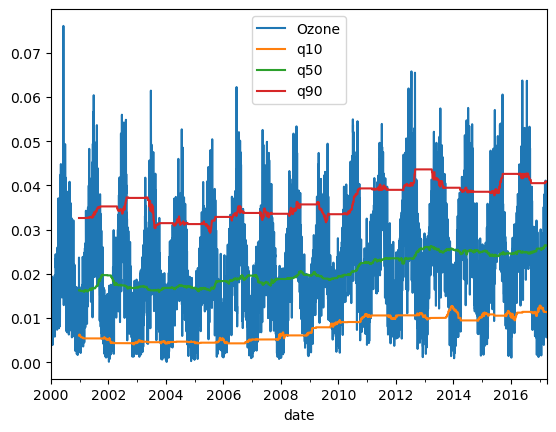

In [16]:
# Plot the data
df.plot(y=["Ozone","q10","q50","q90"])
plt.show()

#### Cumulative sum vs .diff()
We'll about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() 

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [20]:
#read data
data = pd.read_csv('Datasets/Stock_data-/google.csv', parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [24]:
data.head(10)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
2014-01-09,564.55
2014-01-10,564.52


In [21]:
#Apply .diff() to data, drop missing values, and assign the result to differences
differences = data.diff().dropna()
differences.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 594 entries, 2014-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   594 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


In [25]:
differences.head(10)

,Close
Date,
2014-01-03,-4.05
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49
2014-01-10,-0.03
2014-01-14,13.20
2014-01-15,-0.39
2014-01-16,3.79
2014-01-17,-2.84


In [29]:
#Use .first('D') to select the first price from data, and assign it to start_price
start_price = data.first('D')
start_price

,Close
Date,
2014-01-02,556.0


In [36]:
#Use .append() to combine start_price and differences, apply .cumsum() and assign this to cumulative_sum
cumulative_sum = start_price.append(differences).cumsum()
cumulative_sum.head()

C:\Users\Yira Yareth\AppData\Local\Temp\ipykernel_5376\3470628473.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cumulative_sum = start_price.append(differences).cumsum()


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-07,562.71
2014-01-08,563.89
2014-01-09,558.40
